To do:
- [ ] plot the top income and wealth shares in the US over time
- [ ] plot the income and wealth gini in the US over time
- [ ] plot the share and gini with transfer and tax

# plot the top income and wealth shares in the US over time

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def plot_ginis(x, y, 
               plotlabel="total income gini", 
               ylabel="gini coefficient", 
               path='wgini_us.pdf'):
    
    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', label=plotlabel)

    ax.set_xlabel("year", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    if path is not None:
        plt.savefig(path)
    plt.show()

In [4]:
df = pd.read_stata('https://github.com/QuantEcon/high_dim_data/blob/main/SCF_plus/SCF_plus.dta?raw=true')
df

,prepaid,year,id,impnum,oestdebt,CPI,life,moneymarketacc,bnd,ofin,...,ffanw,othdebt,wgt,ffafin,ffanfin,ffanwgroups,liqcer,housing_rent_yd,tincgroups,highsample
0,NaN,1949.0,19490001,1.0,0.0,0.110747,0.0,0.0,1264.142822,0.0,...,266933.750000,0.0,208.000000,11196.693359,280116.968750,50-90%,9932.550781,0.042287,50-90%,NaN
1,NaN,1949.0,19490001,2.0,0.0,0.110747,0.0,0.0,1264.142822,0.0,...,87434.460938,0.0,208.000000,11196.693359,100617.664062,50-90%,9932.550781,0.042287,50-90%,NaN
2,NaN,1949.0,19490001,3.0,0.0,0.110747,0.0,0.0,1264.142822,0.0,...,795034.937500,0.0,208.000000,11196.693359,808218.125000,Top 10%,9932.550781,0.042287,50-90%,NaN
3,NaN,1949.0,19490001,4.0,0.0,0.110747,0.0,0.0,1264.142822,0.0,...,94531.781250,0.0,208.000000,11196.693359,107714.984375,50-90%,9932.550781,0.042287,50-90%,NaN
4,NaN,1949.0,19490001,5.0,0.0,0.110747,0.0,0.0,1264.142822,0.0,...,166081.031250,0.0,208.000000,11196.693359,179264.250000,50-90%,9932.550781,0.042287,50-90%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511515,0.0,2016.0,2016999,1.0,0.0,1.000000,3500.0,0.0,0.000000,0.0,...,105300.000000,0.0,6176.667480,57300.000000,282000.000000,50-90%,23800.000000,NaN,50-90%,NaN
511516,0.0,2016.0,2016999,2.0,0.0,1.000000,4600.0,0.0,0.000000,0.0,...,104200.000000,0.0,6207.699219,56200.000000,283000.000000,50-90%,20600.000000,NaN,50-90%,NaN
511517,0.0,2016.0,2016999,3.0,0.0,1.000000,3800.0,0.0,0.000000,0.0,...,88000.000000,0.0,6199.456055,40000.000000,282000.000000,0-50%,19700.000000,NaN,50-90%,NaN
511518,0.0,2016.0,2016999,4.0,0.0,1.000000,3000.0,0.0,0.000000,0.0,...,100200.000000,0.0,6194.734863,51200.000000,283000.000000,50-90%,23200.000000,NaN,50-90%,NaN


In [6]:
df = df[['id', 'year', 'ffanw', 'impnum', 'tinc', 'incws', 
         'yearmerge', 'wgtI95W95', 'ffanwgroups', 'tincgroups']]

In [14]:
df['nw'] = df['ffanw'] 
df['ti'] = df['tinc']
df['li'] = df['incws']

df1=df.astype({'yearmerge': int, 'year': int}).dropna()
df2 = df1.groupby('yearmerge').sum().reset_index()

/var/folders/1q/0w60kv813lgc9w3t7x8dgbj00000gn/T/ipykernel_40901/1242719045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nw'] = df['ffanw']
/var/folders/1q/0w60kv813lgc9w3t7x8dgbj00000gn/T/ipykernel_40901/1242719045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ti'] = df['tinc']
/var/folders/1q/0w60kv813lgc9w3t7x8dgbj00000gn/T/ipykernel_40901/1242719045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [16]:
df3 = df2[['yearmerge', 'wgtI95W95']]
df3.columns = 'yearmerge', 'fw'
df4 = pd.merge(df3, df1, how="left", on=["yearmerge"])
df4['fw'] = df4['wgtI95W95'] / df4['fw']
df4['nwfw'] = df4['nw'] * df4['fw']
df4['tifw'] = df4['ti'] * df4['fw']
df4['lifw'] = df4['li'] * df4['fw']

In [17]:
dfx_1 = df4.groupby('yearmerge').sum().reset_index()
df5 = df4[df4['ffanwgroups'] == 'Top 10%']
df6 = df4[df4['tincgroups'] == 'Top 10%']

In [24]:
dfx_2 = df5.groupby('yearmerge').sum().reset_index()
dfx_3 = df6.groupby('yearmerge').sum().reset_index()

dfx_1['nwfwtop10'] = dfx_2['nwfw']
dfx_1['tifwtop10'] = dfx_3['tifw']
dfx_1['lifwtop10'] = dfx_3['lifw']

dfx_1['nwfw'] = dfx_1['nwfwtop10'] / dfx_1['nwfw']
dfx_1['tifw'] = dfx_1['tifwtop10'] / dfx_1['tifw']
dfx_1['lifw'] = dfx_1['lifwtop10'] / dfx_1['lifw']
dfx_4 = dfx_1[['yearmerge', 'nwfw', 'tifw', 'lifw']]

In [25]:
dfx_4

,yearmerge,nwfw,tifw,lifw
0,1950,0.728481,0.344888,0.194463
1,1953,0.716981,0.318291,0.208020
2,1956,0.720734,0.342615,0.238985
3,1959,0.699496,0.329404,0.242411
4,1962,0.724429,0.334118,0.140910
5,1965,0.688363,0.331124,0.140400
6,1968,0.706939,0.318522,0.243205
7,1971,0.688179,0.314425,0.215095
8,1977,0.640513,0.350292,0.248622
9,1983,0.662277,0.335159,0.263979


In [34]:
topwg = np.asarray(dfx_4['nwfw'])
topit = np.asarray(dfx_4['tifw'])
topli = np.asarray(dfx_4['lifw'])
years = dfx_4['yearmerge']

In [48]:
topli_new = topli
topli_new[5] = (topli[4] + topli[6]) / 2

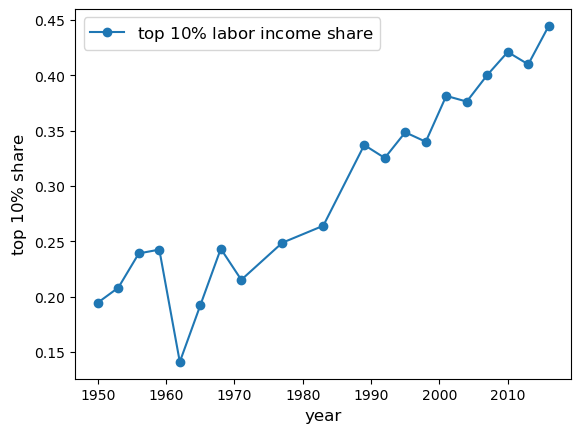

In [49]:
plot_ginis(years, topli_new,
           plotlabel="top $10\%$ labor income share", 
           ylabel="top $10\%$ share",
           path=None) # 2.15

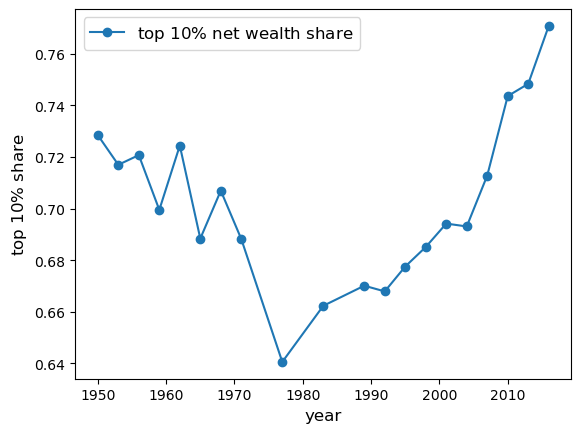

In [36]:
plot_ginis(years, topwg,
           plotlabel="top $10\%$ net wealth share", 
           ylabel="top $10\%$ share", 
           path=None) # 2.14

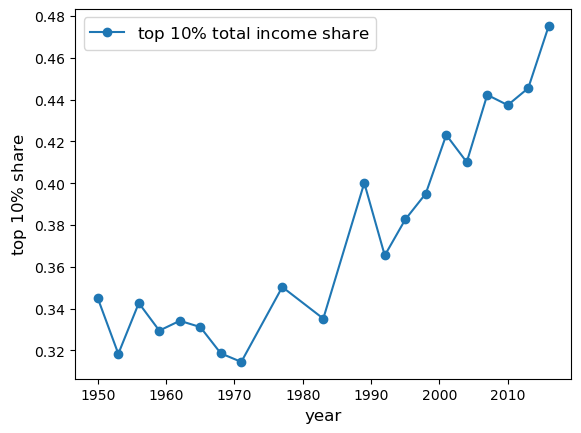

In [38]:
plot_ginis(years, topit,
           plotlabel="top $10\%$ total income share", 
           ylabel="top $10\%$ share", 
           path=None) # 2.14

## plot the income and wealth gini in the US over time

In [41]:
# @njit(parallel=True)
def gini_coefficient(d, x='nw', aw='wgtI95W95'):
    r"""
    Implements the Gini inequality index with analytical weights

    References
    ----------

    https://en.wikipedia.org/wiki/Gini_coefficient
    """
    
    d = d[[x, aw]].sort_values(x, ascending=True).copy()
    
    y = d[x]
    
    f_x = d[aw] / d[aw].sum()
    F_x = f_x.cumsum()
    
    mu = np.sum(y * f_x)
    
    cov = np.cov(y, F_x, rowvar=False, aweights=f_x)[0,1]
    
    return 2 * cov / mu

In [42]:
df4

,yearmerge,fw,id,year,ffanw,impnum,tinc,incws,wgtI95W95,ffanwgroups,tincgroups,nw,ti,li,nwfw,tifw,lifw
0,1950,0.000023,19490001,1949,266933.750000,1.0,55483.027344,0.000000,0.998732,50-90%,50-90%,266933.750000,55483.027344,0.000000,6.121030,1.272276,0.000000
1,1950,0.000023,19490001,1949,87434.460938,2.0,55483.027344,0.000000,0.998732,50-90%,50-90%,87434.460938,55483.027344,0.000000,2.004951,1.272276,0.000000
2,1950,0.000023,19490001,1949,795034.937500,3.0,55483.027344,0.000000,0.998732,Top 10%,50-90%,795034.937500,55483.027344,0.000000,18.230864,1.272276,0.000000
3,1950,0.000023,19490001,1949,94531.781250,4.0,55483.027344,0.000000,0.998732,50-90%,50-90%,94531.781250,55483.027344,0.000000,2.167698,1.272276,0.000000
4,1950,0.000023,19490001,1949,166081.031250,5.0,55483.027344,0.000000,0.998732,50-90%,50-90%,166081.031250,55483.027344,0.000000,3.808387,1.272276,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509450,2016,0.000049,2016999,2016,105300.000000,1.0,103288.914062,103288.914062,6.168690,50-90%,50-90%,105300.000000,103288.914062,103288.914062,5.162679,5.064079,5.064079
509451,2016,0.000049,2016999,2016,104200.000000,2.0,103288.914062,103288.914062,6.199682,50-90%,50-90%,104200.000000,103288.914062,103288.914062,5.134414,5.089521,5.089521
509452,2016,0.000049,2016999,2016,88000.000000,3.0,103288.914062,103288.914062,6.191450,0-50%,50-90%,88000.000000,103288.914062,103288.914062,4.330408,5.082763,5.082763
509453,2016,0.000049,2016999,2016,100200.000000,4.0,103288.914062,103288.914062,6.186734,50-90%,50-90%,100200.000000,103288.914062,103288.914062,4.927005,5.078892,5.078892


In [43]:
df7 = df4.groupby('yearmerge').apply(gini_coefficient, x='nw').to_frame().reset_index()
df7.columns = 'yearmerge', 'nw'

df8 = df4.groupby('yearmerge').apply(gini_coefficient, x='ti').to_frame().reset_index()
df8.columns = 'yearmerge', 'ti'

df9 = df4.groupby('yearmerge').apply(gini_coefficient, x='li').to_frame().reset_index()
df9.columns = 'yearmerge', 'li'

In [44]:
df8['nw'] = df7['nw']
df8['li'] = df9['li']

In [45]:
df8

,yearmerge,ti,nw,li
0,1950,0.442887,0.825467,0.537074
1,1953,0.425954,0.805667,0.516405
2,1956,0.452425,0.812515,0.541754
3,1959,0.438263,0.796247,0.527094
4,1962,0.444881,0.814602,0.534969
5,1965,0.436888,0.788713,0.748102
6,1968,0.428210,0.801978,0.536256
7,1971,0.427249,0.791657,0.559171
8,1977,0.461506,0.756274,0.569864
9,1983,0.456792,0.775618,0.571856


In [46]:
wg = np.asarray(df8['nw'])
it = np.asarray(df8['ti'])
li = np.asarray(df8['li'])

In [50]:
li_new = li
li_new[5] = (li[4] + li[6]) / 2

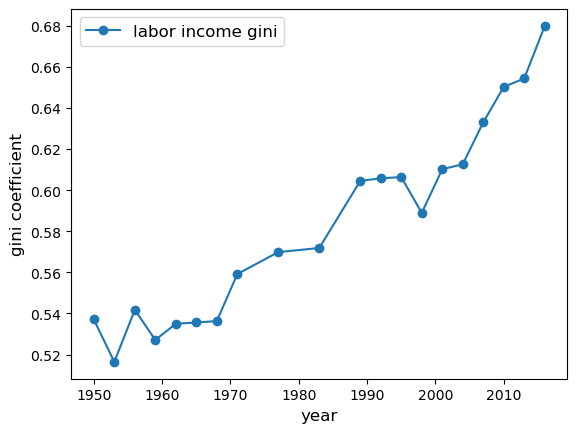

In [51]:
plot_ginis(years, li_new, 
           plotlabel="labor income gini", 
           ylabel="gini coefficient", 
           path=None) # 2.13

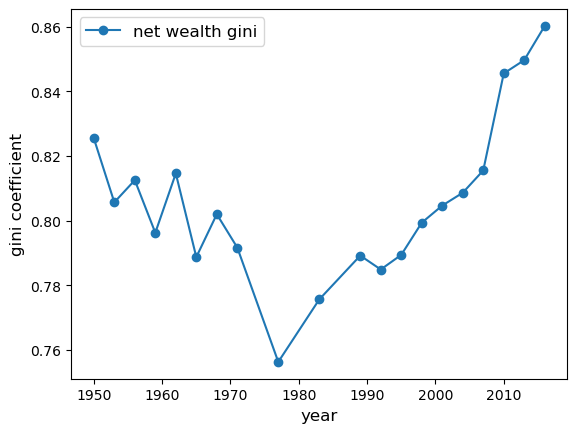

In [52]:
plot_ginis(years, wg,
           plotlabel="net wealth gini", 
           ylabel="gini coefficient", 
           path=None) # 2.12

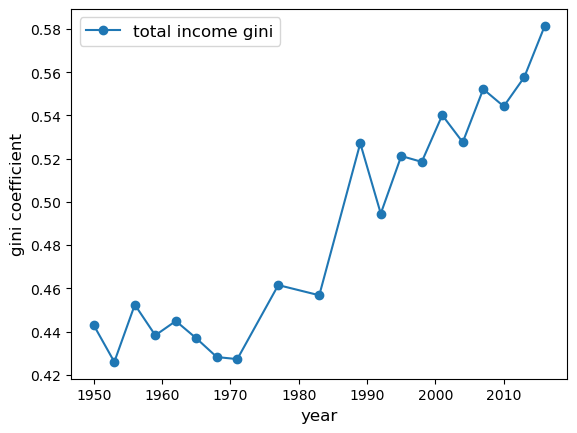

In [53]:
plot_ginis(years, 
           it, 
           plotlabel="total income gini", 
           ylabel="gini coefficient", 
           path=None)

# plot the share and gini with transfer and tax